### Context:

- LoanTap is an online platform committed to delivering customized loan products to millennials. 
- They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.


- The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

- LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:


- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan


- This case study will focus on the underwriting process behind Personal Loan only


## Problem Statement:

- Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?



## Data dictionary:

1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : LoanTap assigned loan grade
6. sub_grade : LoanTap assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during registration.
11. verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual



        Concept Used:

        Exploratory Data Analysis
        Feature Engineering
        Logistic Regression
        Precision Vs Recall Tradeoff




    Simple Feature Engineering steps:
    E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

    1. Pub_rec
    2. Mort_acc
    3. Pub_rec_bankruptcies

- Missing values and Outlier Treatment
- Scaling - Using MinMaxScaler or StandardScaler
- Used Logistic Regression Model from Sklearn/Statsmodel library and explain the results

#####  Results Evaluation:

- Classification Report
- ROC AUC curve
- Precision recall curve

####  Tradeoff Questions:

- How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

- Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone






In [439]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [440]:
df = pd.read_csv("logistic_regression.txt")

In [441]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [442]:
df.shape

(396030, 27)

- #### 396030 data points , 26 features , 1 label.

## Missing Values Check: 

In [443]:
def missing_df(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, percentage_missing_df],axis = 1, keys=['Total', 'Percent'])
    return missingDF


missing_data = missing_df(df)
missing_data[missing_data["Total"]>0]


,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


In [444]:
(df.isna().sum() / df.shape[0] ) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

### Descriptive Statistics : 

In [445]:
df.describe().round(1)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,395754.0,396030.0,358235.0,395495.0
mean,14113.9,13.6,431.8,74203.2,17.4,11.3,0.2,15844.5,53.8,25.4,1.8,0.1
std,8357.4,4.5,250.7,61637.6,18.0,5.1,0.5,20591.8,24.5,11.9,2.1,0.4
min,500.0,5.3,16.1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
25%,8000.0,10.5,250.3,45000.0,11.3,8.0,0.0,6025.0,35.8,17.0,0.0,0.0
50%,12000.0,13.3,375.4,64000.0,16.9,10.0,0.0,11181.0,54.8,24.0,1.0,0.0
75%,20000.0,16.5,567.3,90000.0,23.0,14.0,0.0,19620.0,72.9,32.0,3.0,0.0
max,40000.0,31.0,1533.8,8706582.0,9999.0,90.0,86.0,1743266.0,892.3,151.0,34.0,8.0


- #### Loan Amount, Installments, Annual Income , revol_bal : all these columns have large differnece in mean and median . That means outliers are present in the data. 

In [446]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [448]:
columns_type = df.dtypes

In [449]:
columns_type[columns_type=="object"]

term                   object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
purpose                object
title                  object
earliest_cr_line       object
initial_list_status    object
application_type       object
address                object
dtype: object

In [450]:
df.describe(include="object")

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [451]:
len(columns_type[columns_type=="object"])

15

In [452]:
26-15 


11

- #### 15 Non-numerical (categorical/date time) features present in the dataset. 

In [453]:
df["loan_status"].value_counts(normalize=True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

- #### As we can see, there is an imbalance in the data. 
- 80% belongs to the class 0 : which is loan fully paid. 
- 20% belongs to the class 1 : which were charged off. 

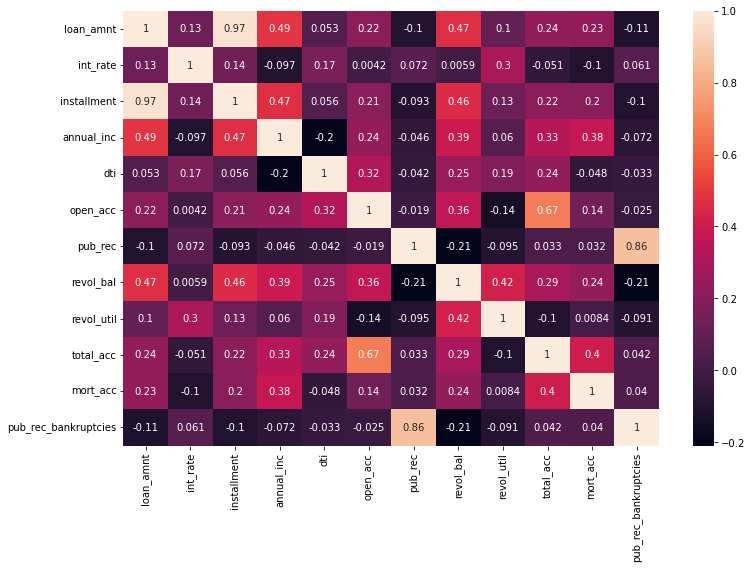

In [454]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

## loan_amnt :

- #### The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [455]:
df.groupby(by = "loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

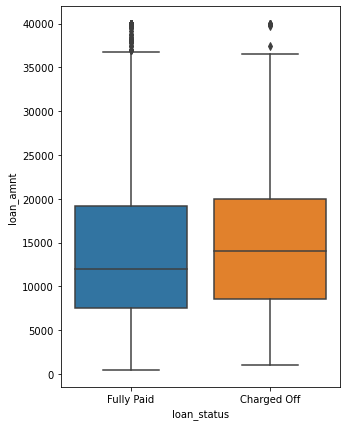

In [456]:
plt.figure(figsize=(5,7))
sns.boxplot(y=df["loan_amnt"],
            x=df["loan_status"])

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

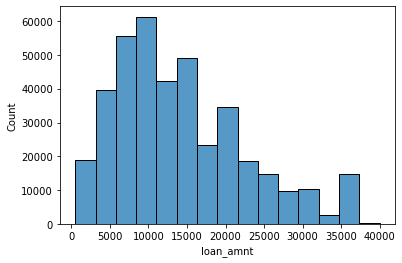

In [457]:
sns.histplot(df["loan_amnt"],bins = 15)

- ####  for loan status Charged_off, the mean and median of loan_amount is higher than fully paid.
- #### also the distribution of loan_amnt is right skewed, which says it has outlier presence. 


##  term :

- #### The number of payments on the loan. Values are in months and can be either 36 or 60.


In [458]:
df["term"].value_counts(dropna=False)

 36 months    302005
 60 months     94025
Name: term, dtype: int64

####  P[loan_statis | term]

In [459]:
pd.crosstab(index=df["term"],
            columns=df["loan_status"], normalize="index" , margins  = True
           ) * 100

loan_status,Charged Off,Fully Paid
term,,
36 months,15.774573,84.225427
60 months,31.941505,68.058495
All,19.612908,80.387092


<AxesSubplot:xlabel='term'>

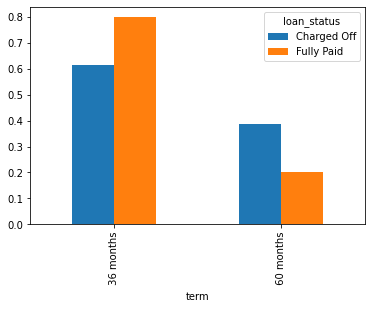

In [460]:
pd.crosstab(index=df["term"],
            columns =df["loan_status"], normalize="columns"
           ).plot(kind = "bar")

In [461]:
# as we can observe 
# the conditional probability 
# of loan fully paid given that its 36 month term is higher then charged off.  

# loan fully paid probability when 60 month term is lower than charged off. 

In [462]:
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df['term'].map(term_values)


##  int_rate :

- #### Interest Rate on the loan


In [463]:
df.groupby(by = "loan_status")["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15.882587,4.388135,5.32,12.99,15.61,18.64,30.99
Fully Paid,318357.0,13.092105,4.319105,5.32,9.91,12.99,15.61,30.99


<AxesSubplot:xlabel='int_rate', ylabel='Count'>

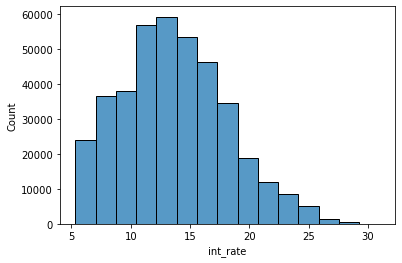

In [464]:
sns.histplot(df["int_rate"],bins = 15)

<AxesSubplot:xlabel='int_rate', ylabel='loan_status'>

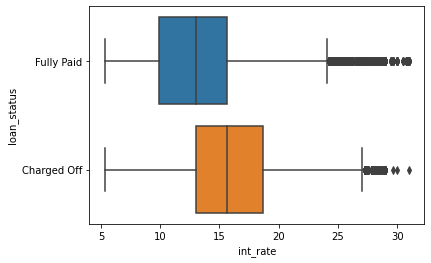

In [465]:
sns.boxplot(x=df["int_rate"],
            y=df["loan_status"])

In [466]:
df[df["loan_status"] == "Charged Off"]["int_rate"].median(),df[df["loan_status"] == "Charged Off"]["int_rate"].mean()


(15.61, 15.882587256832393)

In [467]:
df[df["loan_status"] == "Fully Paid"]["int_rate"].median(),df[df["loan_status"] == "Fully Paid"]["int_rate"].mean()

(12.99, 13.092105403703817)

In [468]:
# for charge_off Loan Status ,
# interest_rate median and mean is higher than fully paid.


- ####  for loan status Charged_off, the mean and median of interest_rate is higher than fully paid.
- #### also the distribution of interest_rate is right skewed, which says it has outlier presence. 


##  grade :

- #### LoanTap assigned loan grade

- #### Loan grades are set based on both the borrower's credit profile and the nature of the contract.


<AxesSubplot:>

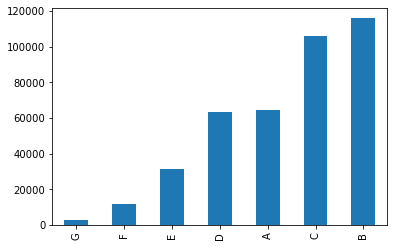

In [469]:
df["grade"].value_counts().sort_values().plot(kind = "bar")

In [470]:
df["grade"].value_counts(dropna=False)

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [471]:
pd.crosstab(index = df["grade"],
            columns= df["loan_status"],normalize= "index", margins = True)

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611
All,0.196129,0.803871


<AxesSubplot:xlabel='grade'>

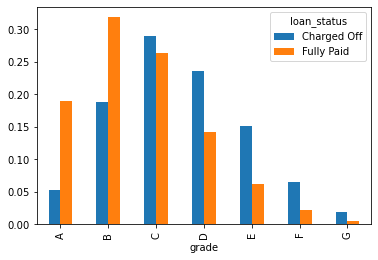

In [472]:
pd.crosstab(index = df["grade"],
            columns= df["loan_status"],normalize= "columns").plot(kind  = "bar")

In [473]:
#  probability of loan_status as fully_paid decreases with grade is E,F,G

In [474]:
## we can conclude the relationship exists 
## between loan_status and LoanTap assigned loan grade.



## sub_grade : 

- #### LoanTap assigned loan subgrade


In [475]:
# pd.crosstab(index = df["sub_grade"],
#             columns= df["loan_status"],normalize= "index", margins = True)*100

<AxesSubplot:xlabel='sub_grade'>

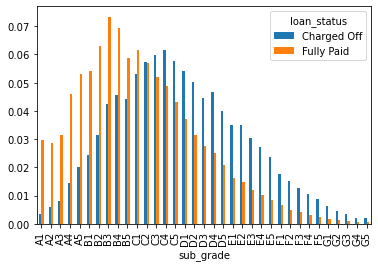

In [476]:
pd.crosstab(index = df["sub_grade"],
            columns= df["loan_status"],normalize= "columns", ).plot(kind = "bar")

In [477]:
# Similar pattern is observed for sub_grade as grade . 

#  later target encoding 

##   emp_title :

- #### The job title supplied by the Borrower when applying for the loan.*


In [478]:
df["emp_title"].value_counts(dropna=False).sort_values(ascending=False).head(15)

NaN                 22927
Teacher              4389
Manager              4250
Registered Nurse     1856
RN                   1846
Supervisor           1830
Sales                1638
Project Manager      1505
Owner                1410
Driver               1339
Office Manager       1218
manager              1145
Director             1089
General Manager      1074
Engineer              995
Name: emp_title, dtype: int64

In [479]:
df["emp_title"].nunique()

173105

In [480]:
# missing values need to be treated with model based imputation .


# total unique job_titles are 173,105. 
# target encoding while creating model. 

##  emp_length :

- #### Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


In [481]:
df["emp_length"].value_counts(dropna=False)

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
NaN           18301
9 years       15314
Name: emp_length, dtype: int64

In [482]:
pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,19.913453,80.086547
10+ years,18.418610,81.581390
2 years,19.326206,80.673794
3 years,19.523133,80.476867
4 years,19.238477,80.761523
5 years,19.218721,80.781279
6 years,18.919438,81.080562
7 years,19.477400,80.522600
8 years,19.976002,80.023998


<AxesSubplot:xlabel='emp_length'>

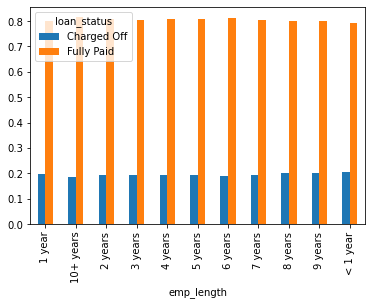

In [483]:
pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [484]:
# visually there doent seems to be much correlation between employement length 
# and loan_status.


In [485]:
stats.chi2_contingency(pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"]))

<IPython.core.display.Javascript object>

(122.11317384460878,
 1.88404995201913e-21,
 10,
 array([[  4976.95191526,  20905.04808474],
        [ 24236.9212716 , 101804.0787284 ],
        [  6889.31521011,  28937.68478989],
        [  6088.98780607,  25576.01219393],
        [  4605.82459912,  19346.17540088],
        [  5094.82810428,  21400.17189572],
        [  4007.59813252,  16833.40186748],
        [  4003.36766571,  16815.63233429],
        [  3685.89036055,  15482.10963945],
        [  2944.78949194,  12369.21050806],
        [  6100.52544284,  25624.47455716]]))

##  home_ownership : 

- #### The home ownership status provided by the borrower during registration or obtained from the credit report.


In [486]:
df["home_ownership"].value_counts(dropna=False)

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [487]:
df["home_ownership"] = df["home_ownership"].replace({"NONE":"OTHER", "ANY":"OTHER"})

In [488]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,16.956057,83.043943
OTHER,15.753425,84.246575
OWN,20.680337,79.319663
RENT,22.662244,77.337756
All,19.612908,80.387092


<AxesSubplot:xlabel='home_ownership'>

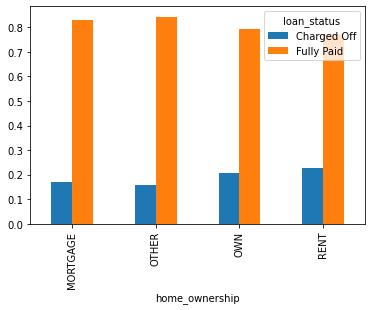

In [489]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index").plot(kind= "bar")

In [490]:
# visually there doent seems to be much correlation between home_ownership 
# and loan_status.
# later target encoding or label encoding .


## annual_inc :

- #### The self-reported annual income provided by the borrower during registration.


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

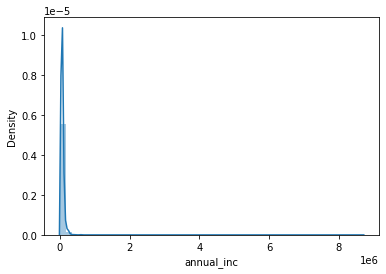

In [491]:
sns.distplot(df["annual_inc"])

In [492]:
df["annual_inc"].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

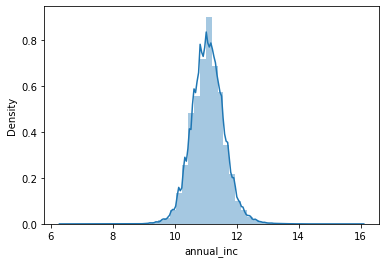

In [493]:
sns.distplot(np.log(df[df["annual_inc"]>0]["annual_inc"]))

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

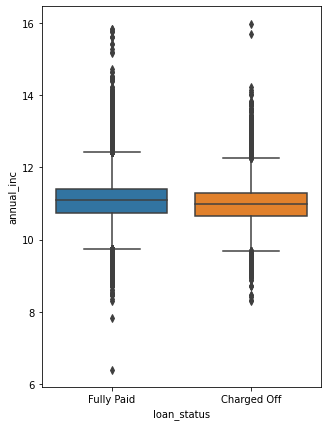

In [494]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["annual_inc"]>0]["annual_inc"]),
            x=df["loan_status"])

In [495]:
##from above boxplot, there seems to be no difference between annual income,
# for loan status categories 


##  verification_status : 

- #### Indicates if income was verified by LoanTap, not verified, or if the income source was verified


In [496]:
df["verification_status"].value_counts(dropna=False)

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [497]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,14.635999,85.364001
Source Verified,21.474293,78.525707
Verified,22.321102,77.678898
All,19.612908,80.387092


<AxesSubplot:xlabel='verification_status'>

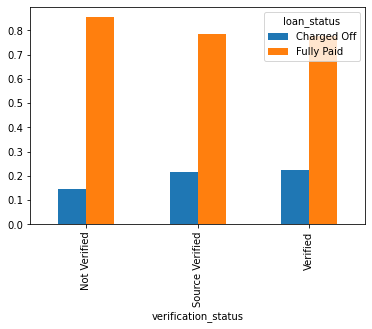

In [498]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [499]:


# later  label encoding  
# .
# Verified           1
# Source Verified    2
# Not Verified       0


## purpose :
- #### A category provided by the borrower for the loan request.


In [500]:
df["purpose"].nunique()

14

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64


<AxesSubplot:xlabel='purpose'>

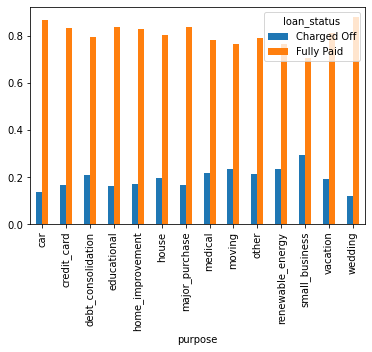

In [501]:
print(df["purpose"].value_counts(dropna=False))
pd.crosstab(index = df["purpose"],
            columns= df["loan_status"],normalize= "index", margins = True)*100
pd.crosstab(index = df["purpose"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


<AxesSubplot:>

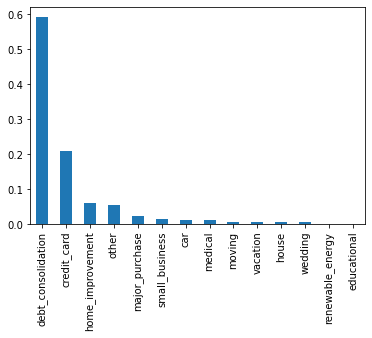

In [502]:
(df["purpose"].value_counts(dropna=False,normalize=True)).plot(kind = "bar")


### 13. 

###  loan_status : Current status of the loan - Target Variable


<AxesSubplot:>

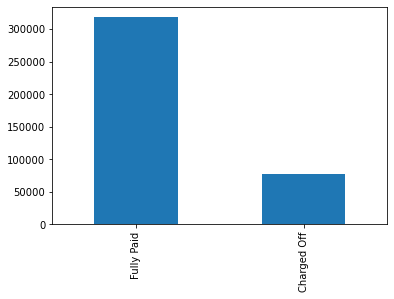

In [503]:
df["loan_status"].value_counts(dropna=False).plot(kind = "bar")


In [504]:
df["loan_status"].value_counts(dropna=False, normalize=True)  * 100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

In [505]:
# Imbalanced data. 

# 80% loans are fully paid.
# 20% loans are charged_off 

    ## most of the loans are taken for 
        debit_card,
        dept_consolidation , 
        home_improvement and others category. 
    ## number of loan applications and amount per purpose category are highest in  above category.

 

##  title :

- #### The loan title provided by the borrower




In [506]:
df["title"].nunique()

48817

In [507]:
df["title"]

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [508]:
# title and purpose are in a way same features. 
# later needs to drop this feature. 


##  dti :
- #### A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.


    dti = monthly total dept payment / monthly income excluding mortgages

In [509]:
df["dti"].describe()

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti'>

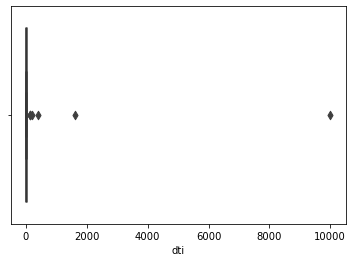

In [510]:
sns.boxenplot((df["dti"]))

In [511]:
# looks like there are lots of outliers in dti column .

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

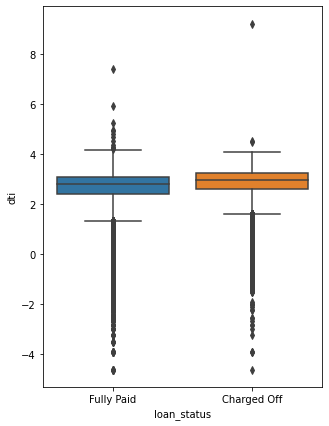

In [512]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["dti"]>0]["dti"]),
            x=df["loan_status"])

     issue_d :
    The month which the loan was funded¶

### issue_d :
- #### The month which the loan was funded


In [513]:
# df["issue_d"].value_counts(dropna=False)

# later use in feature engineering ! 

## earliest_cr_line :
- #### The month the borrower's earliest reported credit line was opened


In [514]:
df["Loan_Tenure"] = ((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))

In [515]:
# pd.to_datetime(df["earliest_cr_line"])

In [516]:
# The month which the loan was funded

In [517]:
# pd.to_datetime(df["issue_d"])

<AxesSubplot:ylabel='Count'>

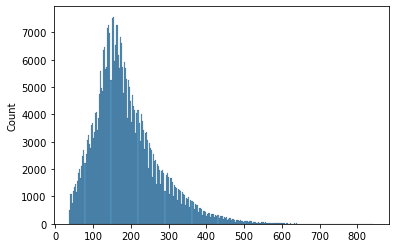

In [518]:
 sns.histplot(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M')))


<AxesSubplot:xlabel='loan_status'>

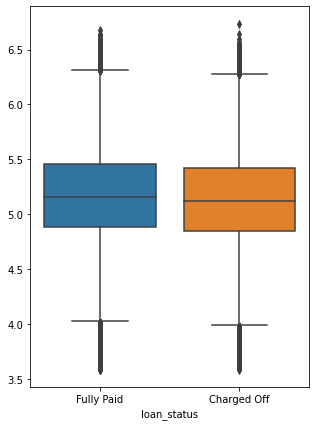

In [519]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))),
            x=df["loan_status"])

## open_acc : 

- #### The number of open credit lines in the borrower's credit file.


In [520]:
df.groupby("loan_status")["open_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,11.602513,5.288507,0.0,8.0,11.0,14.0,76.0
Fully Paid,318357.0,11.240067,5.097647,0.0,8.0,10.0,14.0,90.0


In [521]:
df["open_acc"].nunique()

61

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

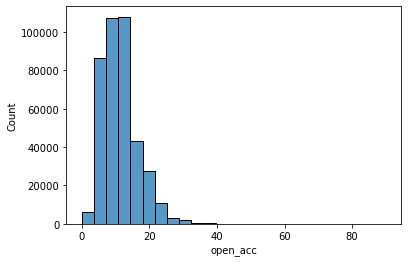

In [522]:
sns.histplot(df["open_acc"],bins = 25)


<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

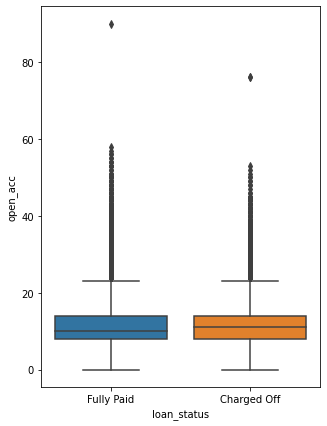

In [523]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["open_acc"],
            x=df["loan_status"])

## pub_rec : 

- #### Number of derogatory public records



- “Derogatory” is seen as negative to lenders, and can include late payments, collection accounts, bankruptcy, charge-offs and other negative marks on your credit report. This can impact your ability to qualify for new credit.

In [524]:
df.groupby("loan_status")["pub_rec"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,0.199606,0.648283,0.0,0.0,0.0,0.0,86.0
Fully Paid,318357.0,0.172966,0.497637,0.0,0.0,0.0,0.0,24.0


<AxesSubplot:xlabel='loan_status', ylabel='pub_rec'>

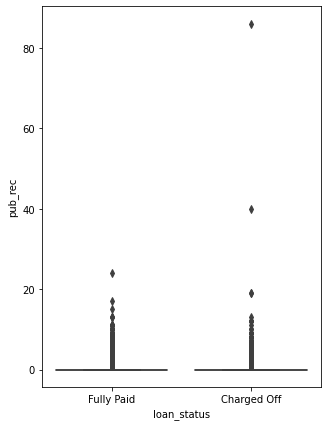

In [525]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["pub_rec"],
            x=df["loan_status"])

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64


<AxesSubplot:xlabel='pub_rec'>

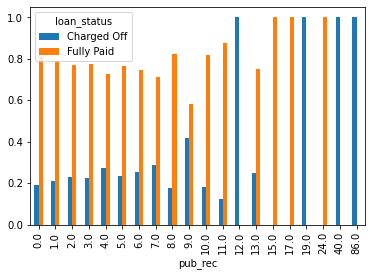

In [526]:
print(df["pub_rec"].value_counts(dropna=False))
pd.crosstab(index = df["pub_rec"],
            columns= df["loan_status"],normalize= "index", margins = True)*100
pd.crosstab(index = df["pub_rec"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


## revol_bal : 

- #### Total credit revolving balance


With revolving credit, a consumer has a line of credit he can keep using and repaying over and over. The balance that carries over from one month to the next is the revolving balance on that loan.




In [527]:
df.groupby("loan_status")["revol_bal"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15390.454701,18203.387930,0.0,6150.0,11277.0,19485.0,1030826.0
Fully Paid,318357.0,15955.327918,21132.193457,0.0,5992.0,11158.0,19657.0,1743266.0


<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

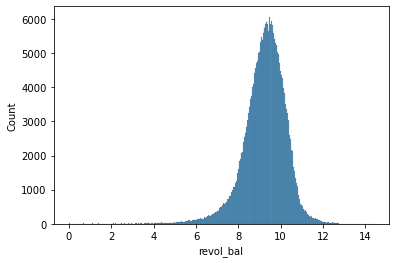

In [528]:
sns.histplot(np.log(df["revol_bal"]))


<AxesSubplot:xlabel='loan_status', ylabel='revol_bal'>

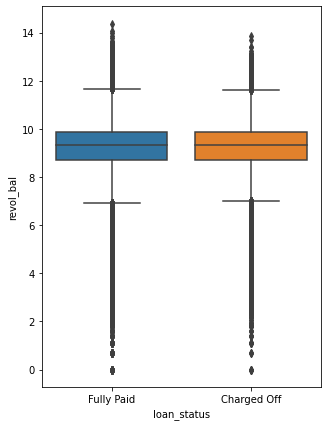

In [529]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["revol_bal"]),
            x=df["loan_status"])

##  revol_util :
- #### Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Your credit utilization rate, sometimes called your credit utilization ratio, is the amount of revolving credit you're currently using divided by the total amount of revolving credit you have available. In other words, it's how much you currently owe divided by your credit limit. It is generally expressed as a percent.

In [530]:
df.groupby("loan_status")["revol_util"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77610.0,57.869824,23.492176,0.0,41.2,59.3,76.2,148.0
Fully Paid,318144.0,52.796918,24.578304,0.0,34.6,53.7,72.0,892.3


<AxesSubplot:xlabel='loan_status', ylabel='revol_util'>

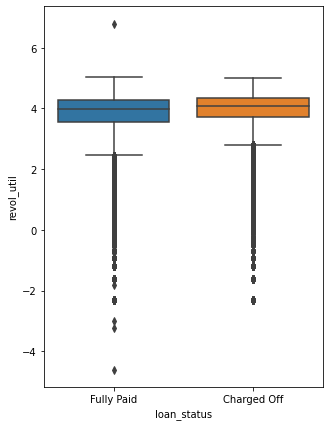

In [531]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["revol_util"]),
            x=df["loan_status"])

##  total_acc : 

- #### The total number of credit lines currently in the borrower's credit file


In [532]:
# df["total_acc"].value_counts()

In [533]:
df.groupby("loan_status")["total_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,24.984152,11.913692,2.0,16.0,23.0,32.0,151.0
Fully Paid,318357.0,25.519800,11.878117,2.0,17.0,24.0,32.0,150.0


<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

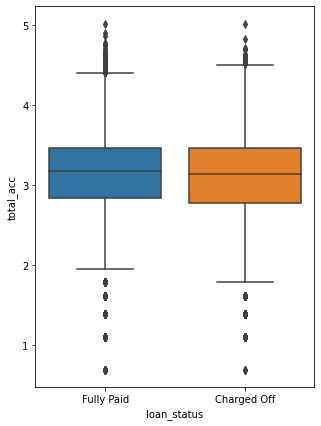

In [534]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["total_acc"]),
            x=df["loan_status"])

## initial_list_status :

- #### The initial listing status of the loan. Possible values are – W, F


In [535]:
df["initial_list_status"].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

f    238066
w    157964
Name: initial_list_status, dtype: int64


<AxesSubplot:xlabel='initial_list_status'>

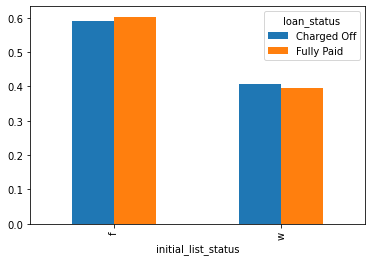

In [536]:
print(df["initial_list_status"].value_counts(dropna=False))

pd.crosstab(index = df["initial_list_status"],
            columns= df["loan_status"],normalize= "columns").plot(kind = "bar")


## application_type : 

- #### Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [537]:
df["application_type"].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64


<AxesSubplot:xlabel='application_type'>

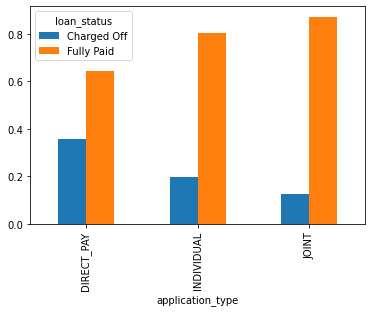

In [538]:
print(df["application_type"].value_counts(dropna=False))

pd.crosstab(index = df["application_type"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


## mort_acc : 

- #### Number of mortgage accounts.


In [539]:
# df["mort_acc"].value_counts(dropna=False)

In [540]:
df.groupby("loan_status")["mort_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,72123.0,1.501213,1.974353,0.0,0.0,1.0,2.0,23.0
Fully Paid,286112.0,1.892836,2.182456,0.0,0.0,1.0,3.0,34.0


<AxesSubplot:xlabel='loan_status', ylabel='mort_acc'>

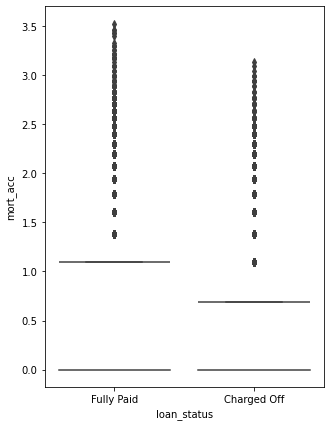

In [541]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["mort_acc"]),
            x=df["loan_status"])

<AxesSubplot:xlabel='mort_acc'>

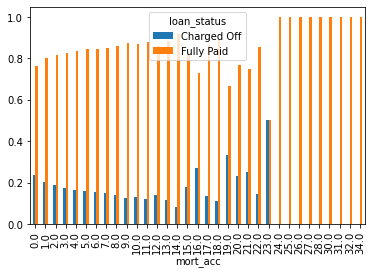

In [542]:
pd.crosstab(index = df["mort_acc"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

## pub_rec_bankruptcies :
- #### Number of public record bankruptcies


In [543]:
df["pub_rec_bankruptcies"].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

0.0    350380
1.0     42790
2.0      1847
NaN       535
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64
loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                     19.499115   80.500885
1.0                     20.394952   79.605048
2.0                     23.226854   76.773146
3.0                     21.082621   78.917379
4.0                     31.707317   68.292683
5.0                     15.625000   84.375000
6.0                     28.571429   71.428571
7.0                     25.000000   75.000000
8.0                     50.000000   50.000000
All                     19.617441   80.382559


<AxesSubplot:xlabel='pub_rec_bankruptcies'>

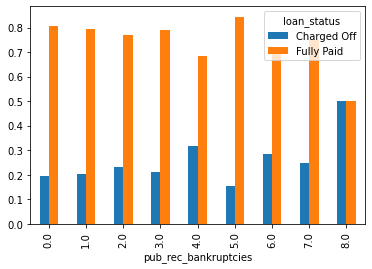

In [544]:
print(df["pub_rec_bankruptcies"].value_counts(dropna=False))
print(pd.crosstab(index = df["pub_rec_bankruptcies"],
            columns= df["loan_status"],normalize= "index", margins = True)*100)
pd.crosstab(index = df["pub_rec_bankruptcies"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


## Address:

- #### Address of the individual

In [545]:
df["address"][10]

'40245 Cody Drives\r\nBartlettfort, NM 00813'

In [546]:
df["address"] = df["address"].str.split().apply(lambda x:x[-1])

In [547]:
df["address"].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: address, dtype: int64

<AxesSubplot:xlabel='address'>

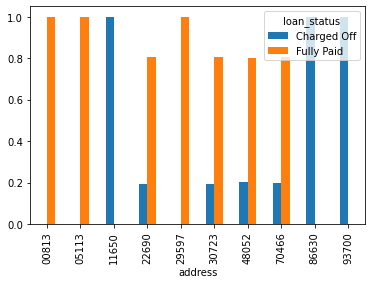

In [548]:
pd.crosstab(index = df["address"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


In [549]:
df["pin_code"] = df["address"]
df.drop(["address"],axis = 1  ,inplace=True)

# dropping unimportant columns 

In [550]:
df.drop(["title","issue_d","earliest_cr_line","initial_list_status"],axis = 1, inplace=True)

In [551]:
df.drop(["pin_code"],axis=1,inplace=True)

In [552]:
df.drop(["Loan_Tenure"],axis=1,inplace=True)

## Missing value treatment

In [553]:
missing_data[missing_data["Percent"]>0]

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


In [554]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(strategy="most_frequent")
df["mort_acc"] = Imputer.fit_transform(df["mort_acc"].values.reshape(-1,1))

In [555]:
df.dropna(inplace=True)

In [556]:
missing_df(df)

,Total,Percent
loan_amnt,0,0.0
term,0,0.0
mort_acc,0,0.0
application_type,0,0.0
total_acc,0,0.0
revol_util,0,0.0
revol_bal,0,0.0
pub_rec,0,0.0
open_acc,0,0.0
dti,0,0.0


## Pre-proccessing : 


### Feature Engineering

In [557]:
from category_encoders import TargetEncoder

In [558]:
TE = TargetEncoder()

In [559]:
df["loan_status"].replace({"Fully Paid":0,
                          "Charged Off" : 1},inplace=True)

In [560]:
df.sample(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
132510,6000.0,36,13.98,205.01,C,C1,Human Resources Manager,10+ years,MORTGAGE,106000.0,Not Verified,0,credit_card,11.97,19.0,0.0,18781.0,68.8,41.0,INDIVIDUAL,4.0,0.0
375392,7000.0,36,8.90,222.28,A,A5,Digital River Inc.,5 years,RENT,125000.0,Source Verified,0,debt_consolidation,12.52,9.0,0.0,16519.0,43.8,25.0,INDIVIDUAL,1.0,0.0
224793,8500.0,36,13.99,290.47,C,C4,Analyst,10+ years,RENT,86400.0,Verified,0,debt_consolidation,25.89,15.0,0.0,29778.0,75.8,38.0,INDIVIDUAL,0.0,0.0


In [561]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'mort_acc', 'pub_rec_bankruptcies'], dtype='object')

In [562]:
target_enc = ["sub_grade","grade",'term', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'application_type']

In [563]:
for col in target_enc:
    from category_encoders import TargetEncoder
    TEncoder = TargetEncoder()
    
    df[col] = TEncoder.fit_transform(df[col],df["loan_status"])

In [564]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,0.121856,0.134935,0.247191,0.184208,0.222392,117000.0,0.144925,0,0.183348,26.24,16.0,0.0,36369.0,41.8,25.0,0.1922,0.0,0.0
1,8000.0,36,11.99,265.68,0.121856,0.150496,0.316512,0.191896,0.166495,65000.0,0.144925,0,0.203895,22.05,17.0,0.0,20131.0,53.3,27.0,0.1922,3.0,0.0
2,15600.0,36,10.49,506.97,0.121856,0.119644,0.181819,0.206840,0.222392,43057.0,0.214123,0,0.162381,12.79,13.0,0.0,11987.0,92.2,26.0,0.1922,0.0,0.0
3,7200.0,36,6.49,220.65,0.059785,0.044741,0.192221,0.189319,0.222392,54000.0,0.144925,0,0.162381,2.60,6.0,0.0,5472.0,21.5,13.0,0.1922,0.0,0.0
4,24375.0,60,17.27,609.33,0.207325,0.239437,0.192221,0.200951,0.166495,55000.0,0.216398,1,0.162381,33.95,13.0,0.0,24584.0,69.8,43.0,0.1922,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,0.121856,0.134935,0.192221,0.193219,0.222392,40000.0,0.214123,0,0.203895,15.63,6.0,0.0,1990.0,34.3,23.0,0.1922,0.0,0.0
396026,21000.0,36,12.29,700.42,0.207325,0.168489,0.220430,0.191915,0.166495,110000.0,0.214123,0,0.203895,21.45,6.0,0.0,43263.0,95.7,8.0,0.1922,1.0,0.0
396027,5000.0,36,9.99,161.32,0.121856,0.094672,0.268657,0.184208,0.222392,56500.0,0.216398,0,0.203895,17.56,15.0,0.0,32704.0,66.9,23.0,0.1922,0.0,0.0
396028,21000.0,60,15.31,503.02,0.207325,0.192642,0.192221,0.184208,0.166495,64000.0,0.216398,0,0.203895,15.88,9.0,0.0,15704.0,53.8,20.0,0.1922,5.0,0.0


## Outlier treatment :

In [565]:
def outlier_remover(a,df):

    q1 = a.quantile(.25)
    q3 = a.quantile(.75)
    iqr = q3 - q1

    maxx = q3 + 1.5 * iqr
    minn = q1 - 1.5 * iqr

    return df.loc[(a>=minn) & (a<=maxx)]

In [566]:
floats = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc','revol_bal', 'revol_util', 'total_acc']
     

In [567]:
df.sample(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
123592,27000.0,60,19.05,701.14,0.283818,0.309406,0.063830,0.184208,0.222392,66232.0,0.216398,0,0.203895,13.59,12.0,0.0,26067.0,77.1,18.0,0.1922,0.0,0.0
320626,16000.0,36,12.99,539.03,0.121856,0.150496,0.051696,0.184208,0.166495,100000.0,0.144925,0,0.203895,12.54,12.0,1.0,10686.0,44.9,37.0,0.1922,14.0,1.0
113084,5000.0,36,12.21,166.58,0.121856,0.150496,0.192221,0.191915,0.222392,54000.0,0.216398,0,0.298557,12.84,8.0,0.0,5867.0,70.7,10.0,0.1922,0.0,0.0


In [568]:
for i in floats:
    df = outlier_remover(df[i],df)

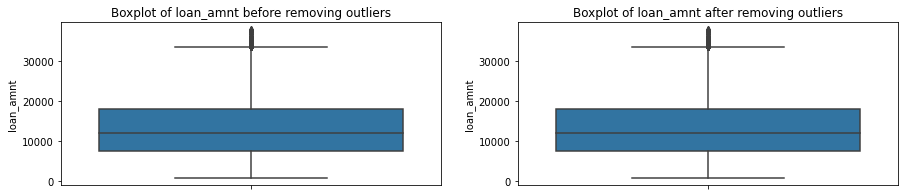

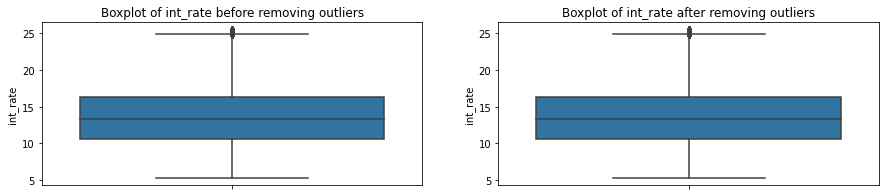

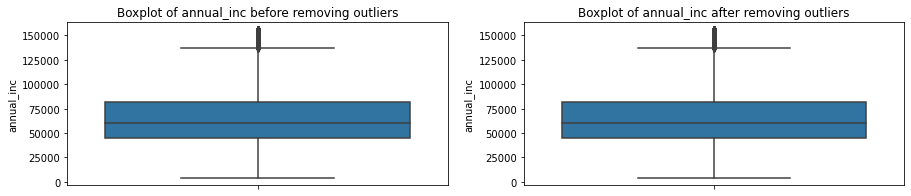

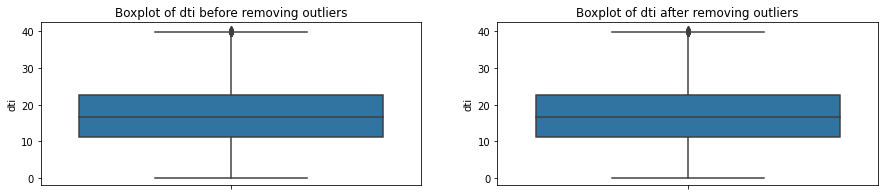

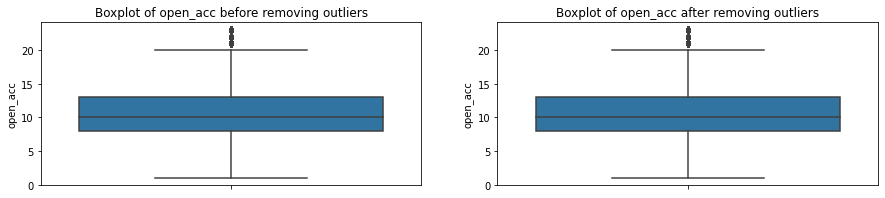

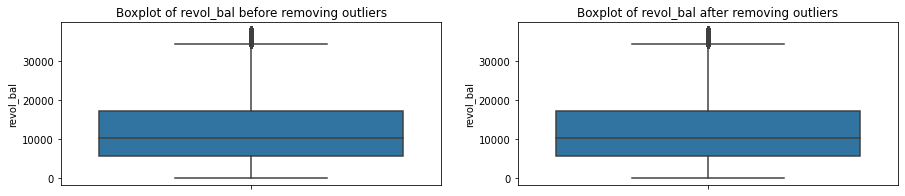

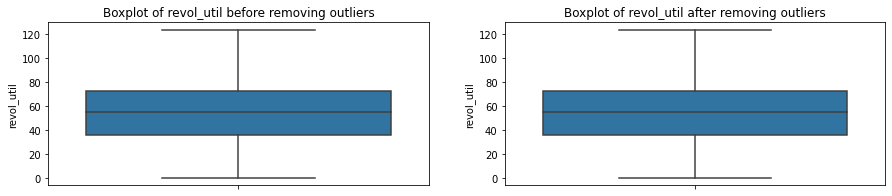

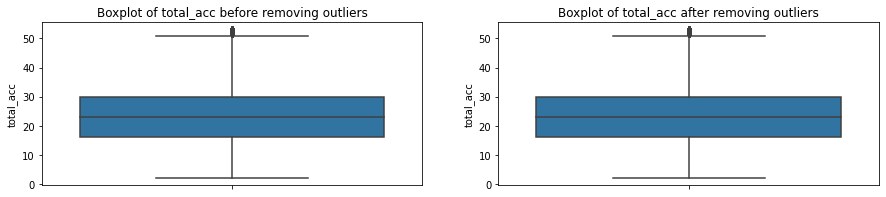

In [569]:
for i in floats:
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    sns.boxplot(y=df[i])
    plt.title(f"Boxplot of {i} before removing outliers")
    plt.subplot(122)
    sns.boxplot(y=df[i])
    plt.title(f"Boxplot of {i} after removing outliers")

    plt.show()

# Missing value check : 

In [570]:
def missing_df(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, percentage_missing_df],axis = 1, keys=['Total', 'Percent'])
    return missingDF


missing_data = missing_df(df)
missing_data[missing_data["Total"]>0]


,Total,Percent


In [572]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'mort_acc', 'pub_rec_bankruptcies'], dtype='object')

In [573]:
df.drop(["mort_acc","pub_rec_bankruptcies"],axis = 1 , inplace=True)

In [591]:
df.drop(["pub_rec"],axis = 1 , inplace=True)

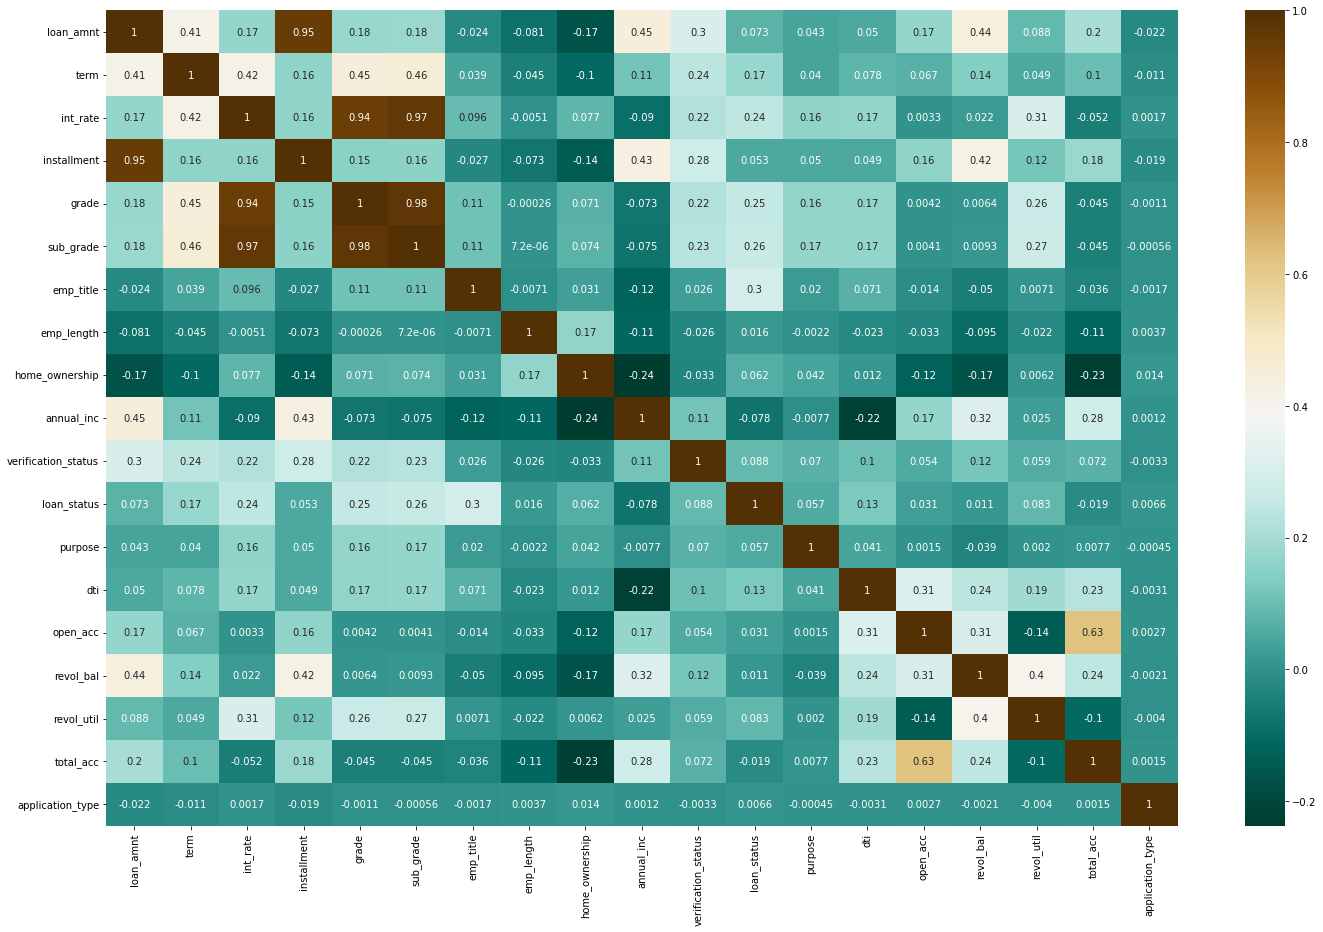

In [592]:
plt.figure(figsize=(24,15))
sns.heatmap(df.corr(),annot=True,cmap='BrBG_r')

plt.show()

## Train-test split : 

In [593]:
X = df.drop(["loan_status"],axis = 1)
y = df["loan_status"]

In [594]:
from sklearn.model_selection import train_test_split

In [595]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                      random_state=3,
                                                      test_size=0.2)

### Logistic Regression on Non-Standardised Data : 

In [596]:
from sklearn.linear_model import LogisticRegression
LR1st = LogisticRegression(class_weight="Auto")

In [597]:
LR1st.fit(X_train,y_train)

LogisticRegression(class_weight='Auto')

In [598]:
LR1st.score(X_test,y_test)

0.8057291180950604

In [599]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [600]:
f1_score(y_test,LR1st.predict(X_test))

0.015904259507125422

In [601]:
recall_score(y_test,LR1st.predict(X_test))

0.008168216740800647

In [602]:
precision_score(y_test,LR1st.predict(X_test))

0.3005952380952381

## Standardizing  - preprocessing

In [603]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()



In [604]:
StandardScaler.fit(X_train)

StandardScaler()

In [605]:
X_train = StandardScaler.transform(X_train)
X_test = StandardScaler.transform(X_test)


In [606]:
from sklearn.linear_model import LogisticRegression
LR_Std = LogisticRegression(C=1.0)
LR_Std.fit(X_train,y_train)
print("Accuracy: ",LR_Std.score(X_test,y_test))
print("f1_score: ",f1_score(y_test,LR_Std.predict(X_test)))
print("recall_score: ",recall_score(y_test,LR_Std.predict(X_test)))
print("precision_score: ",precision_score(y_test,LR_Std.predict(X_test)))

Accuracy:  0.8216606049302123
f1_score:  0.28891918691125434
recall_score:  0.18851597250303276
precision_score:  0.6181384248210023


In [607]:
pd.DataFrame(data=LR_Std.coef_,columns=X.columns).T

,0
loan_amnt,0.032369
term,0.215702
int_rate,-0.085111
installment,0.091627
grade,-0.050123
sub_grade,0.553436
emp_title,0.719550
emp_length,0.030282
home_ownership,0.121333
annual_inc,-0.124877


<AxesSubplot:>

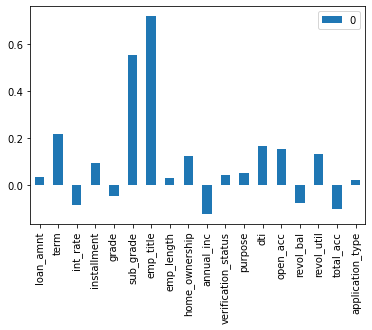

In [608]:
pd.DataFrame(data=LR_Std.coef_,columns=X.columns).T.plot(kind = "bar")

## Data Balancing : 

In [609]:
from imblearn.over_sampling import SMOTE

In [610]:
SmoteBL = SMOTE(k_neighbors=7) 

In [611]:
X_smote , y_smote = SmoteBL.fit_resample(X_train,y_train)

In [612]:
X_smote.shape,  y_smote.shape

((416188, 18), (416188,))

In [613]:
# y_smote.value_counts()


In [614]:
from sklearn.linear_model import LogisticRegression

In [615]:
LogReg = LogisticRegression(max_iter=1000,class_weight="balanced")

In [616]:
from sklearn.model_selection import cross_val_score

In [617]:
cross_val_score(estimator = LogReg,
                cv=5,
                X = X_smote,
                y = y_smote,
                scoring= "f1"
            
       )

array([0.68755061, 0.68799941, 0.68806821, 0.69244224, 0.69372793])

In [618]:
cross_val_score(estimator = LogReg,
                cv=5,
                X = X_smote,
                y = y_smote,
                scoring= "precision"
            
       )

array([0.70255021, 0.70212872, 0.7039998 , 0.70519943, 0.70579314])

In [619]:
cross_val_score(estimator = LogReg,
                cv=5,
                X = X_smote,
                y = y_smote,
                scoring= "accuracy"
            
       )

array([0.69408203, 0.69415411, 0.69497105, 0.69791078, 0.6988719 ])

In [620]:
cross_val_score(estimator = LogReg,
                cv=5,
                X = X_train,
                y = y_train,
                scoring= "precision"
            
       )

array([0.36101122, 0.35930334, 0.36079375, 0.36065039, 0.35940481])

In [621]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=1000,class_weight="balanced")

In [622]:
LogReg.fit(X= X_train ,y = y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [623]:
LogReg.score(X_test,y_test)

0.7111660294071933

In [624]:
LogReg.coef_.round(2)

array([[ 0.05,  0.21, -0.05,  0.07, -0.07,  0.55,  0.81,  0.03,  0.12,
        -0.13,  0.04,  0.06,  0.16,  0.15, -0.07,  0.13, -0.1 ,  0.03]])

In [625]:
from sklearn.metrics  import confusion_matrix, f1_score, precision_score,recall_score
print(confusion_matrix(y_test, LogReg.predict(X_test)))
print(precision_score(y_test ,LogReg.predict(X_test)))
print(recall_score(y_test ,LogReg.predict(X_test)))
print(f1_score(y_test ,LogReg.predict(X_test)))



[[37423 14550]
 [ 4033  8332]]
0.3641290097019491
0.6738374443995148
0.4727778250631259


In [626]:
LogReg.coef_

array([[ 0.05319013,  0.20680404, -0.04541139,  0.06875363, -0.06615804,
         0.55177963,  0.80651431,  0.0299359 ,  0.11636012, -0.1305148 ,
         0.04099812,  0.05520785,  0.1591234 ,  0.15300722, -0.07078372,
         0.13042954, -0.10210778,  0.02991594]])

In [627]:
df.drop(["loan_status"], axis = 1).columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'application_type'], dtype='object')

In [628]:
feature_importance = pd.DataFrame(index = df.drop(["loan_status"],
                                                  axis = 1).columns,
                                  data = LogReg.coef_.ravel()).reset_index()
feature_importance

,index,0
0,loan_amnt,0.053190
1,term,0.206804
2,int_rate,-0.045411
3,installment,0.068754
4,grade,-0.066158
5,sub_grade,0.551780
6,emp_title,0.806514
7,emp_length,0.029936
8,home_ownership,0.116360
9,annual_inc,-0.130515


<AxesSubplot:xlabel='0', ylabel='index'>

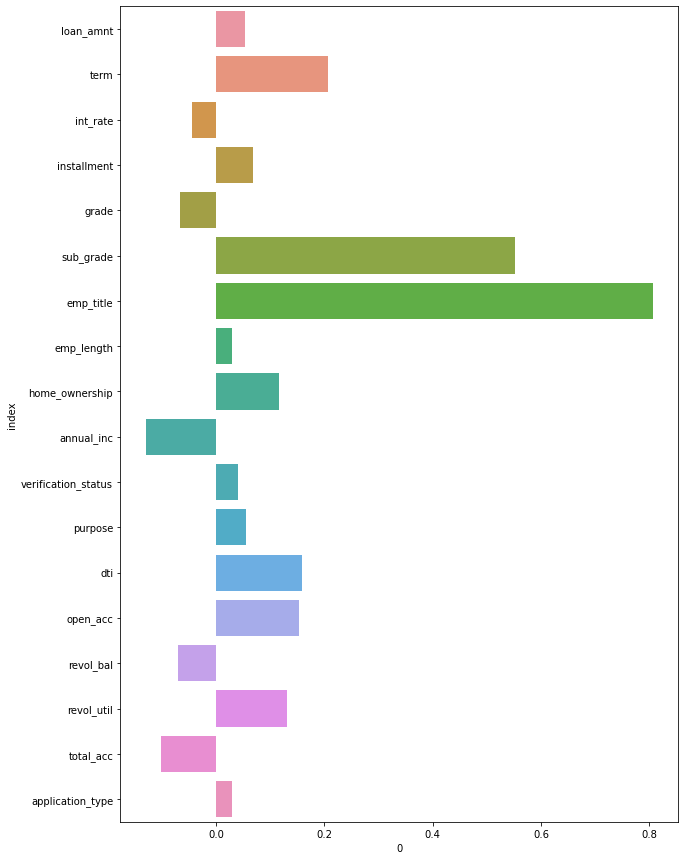

In [629]:
plt.figure(figsize=(10,15))
sns.barplot(y = feature_importance["index"],
           x =  feature_importance[0])

In [630]:
LogReg.score(X_train,y_train)

0.7091043326209442

In [631]:
LogReg.score(X_test,y_test)

0.7111660294071933

<AxesSubplot:>

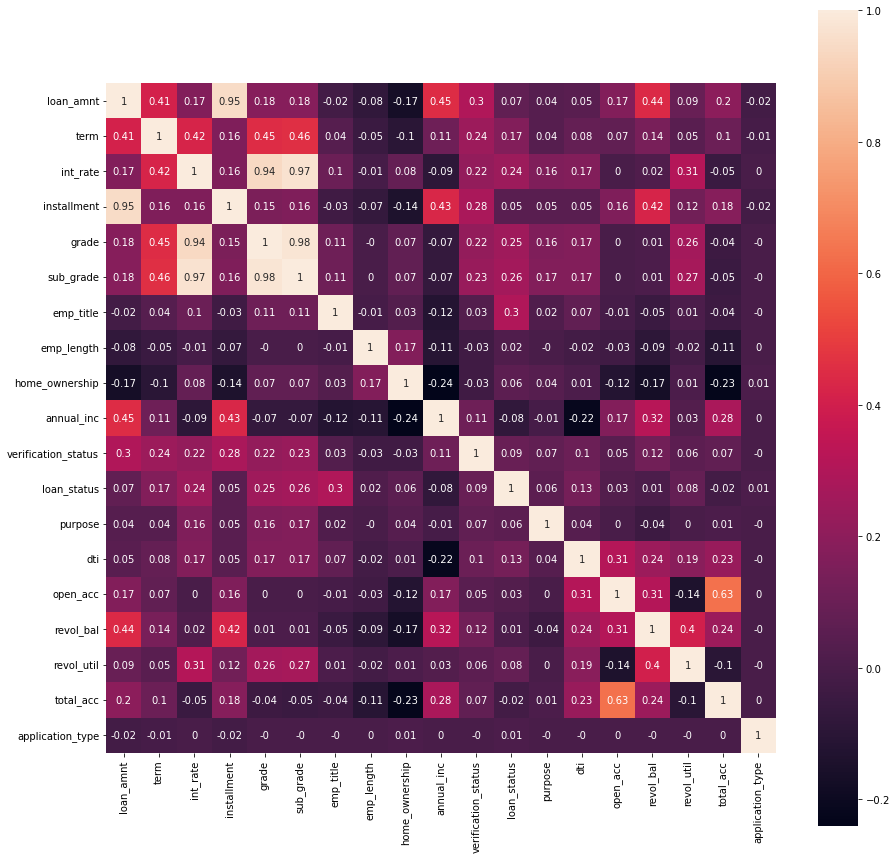

In [632]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr().round(2),annot=True,square=True)

## Metrics : 

In [633]:
from sklearn.metrics  import confusion_matrix, f1_score, precision_score,recall_score
confusion_matrix(y_test, LogReg.predict(X_test))



array([[37423, 14550],
       [ 4033,  8332]], dtype=int64)

In [634]:
precision_score(y_test ,LogReg.predict(X_test))

0.3641290097019491

In [635]:
recall_score(y_test ,LogReg.predict(X_test))

0.6738374443995148

In [636]:
pd.crosstab(y_test ,LogReg.predict(X_test))

col_0,0,1
loan_status,,
0,37423,14550
1,4033,8332


In [637]:
recall_score(y_train ,LogReg.predict(X_train))

0.671146662335553

In [638]:
recall_score(y_test ,LogReg.predict(X_test))

0.6738374443995148

In [639]:
f1_score(y_test ,LogReg.predict(X_test))

0.4727778250631259

In [640]:
f1_score(y_train ,LogReg.predict(X_train))

0.4689809757550824

In [641]:
from sklearn.metrics import ConfusionMatrixDisplay

In [642]:
from sklearn.metrics import fbeta_score

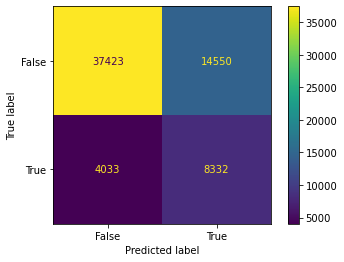

In [643]:
cm_display  = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, 
                                                          LogReg.predict(X_test)),display_labels=[False,True])
cm_display.plot()
plt.show()

In [644]:
# fbeta_score

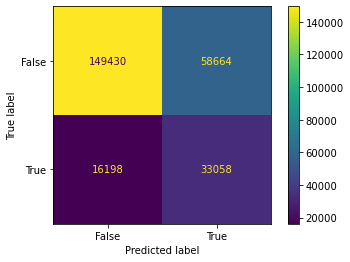

In [645]:
cm_display  = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_train, 
                                                          LogReg.predict(X_train)),display_labels=[False,True])
cm_display.plot()
plt.show()

In [646]:
from sklearn.tree import DecisionTreeClassifier

In [647]:
DecisionTreeClassifier = DecisionTreeClassifier(max_depth=5, splitter="best",
                                               criterion="entropy",class_weight ="balanced")

In [648]:
DecisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5)

In [649]:
DecisionTreeClassifier.score(X_test,y_test)

0.6246852559917934

In [650]:
# DecisionTreeClassifier.score(X_smote,y_smote)

In [651]:
from sklearn.ensemble import RandomForestClassifier

In [652]:
RF = RandomForestClassifier(n_estimators=30,max_depth=10,class_weight="balanced")

In [653]:
RF.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=30)

In [654]:
RF.score(X_test,y_test)

0.6762566445957288

In [669]:
feature_importance = pd.DataFrame(index = df.drop(["loan_status"],
                                                  axis = 1).columns,
                                  data = RF.feature_importances_.ravel()).reset_index()
feature_importance

,index,0
0,loan_amnt,0.014992
1,term,0.055581
2,int_rate,0.092108
3,installment,0.016130
4,grade,0.138375
5,sub_grade,0.151050
6,emp_title,0.392677
7,emp_length,0.004348
8,home_ownership,0.010549
9,annual_inc,0.025980


<AxesSubplot:xlabel='0', ylabel='index'>

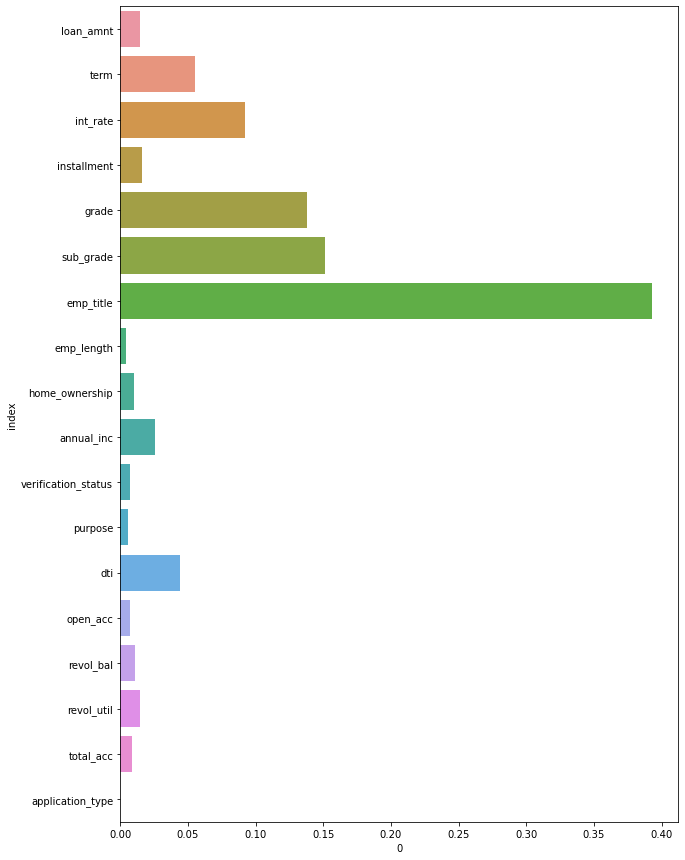

In [670]:
plt.figure(figsize=(10,15))
sns.barplot(y = feature_importance["index"],
           x =  feature_importance[0])

In [655]:
from sklearn.metrics import precision_recall_curve

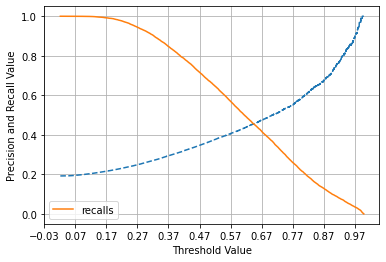

In [656]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, LogReg.predict_proba(X_test)[:,1])


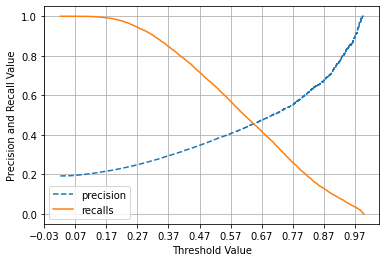

In [657]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, LogReg.predict_proba(X_test)[:,1])

In [658]:
from sklearn.metrics import roc_auc_score,roc_curve

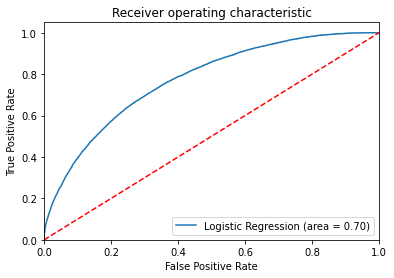

In [659]:
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [660]:
LogReg.predict_proba(X_test)

array([[0.56270909, 0.43729091],
       [0.61265869, 0.38734131],
       [0.46300434, 0.53699566],
       ...,
       [0.34828917, 0.65171083],
       [0.51701816, 0.48298184],
       [0.52665385, 0.47334615]])

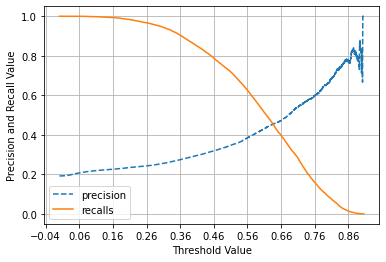

In [661]:
precision_recall_curve_plot(y_test, RF.predict_proba(X_test)[:,1])


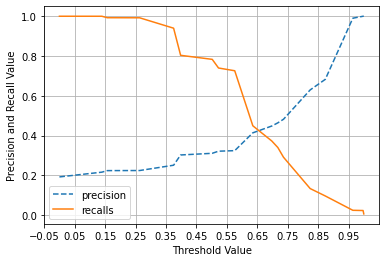

In [662]:
precision_recall_curve_plot(y_test, DecisionTreeClassifier.predict_proba(X_test)[:,1])


In [663]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [664]:
def custom_predict(X, threshold):
    probs = model.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)

In [665]:
new_preds = custom_predict(X=X_test, threshold=0.75)

In [666]:
model.score(X_test,y_test)

0.7111660294071933

In [667]:
precision_score(y_test,new_preds)

0.5361759025404843

## Inferences and Report : 

- 396030 data points , 26 features , 1 label.


- 80% belongs to the class 0 : which is loan fully paid.
- 20% belongs to the class 1 : which were charged off.


- Loan Amount distribution / media is slightly higher for Charged_off loanStatus.


- Probability of CHarged_off status is higher in case of 60 month term.


- Interest Rate mean and media is higher for Charged_off LoanStatus. 




- Probability of Charged_off LoanStatus is higher for Loan Grades are E ,F, G. 
- G grade has the highest probability of having defaulter.
- Similar pattern is visible in sub_grades probability plot.



- Employement Length has overall same probability of Loan_status as fully paid and defaulter.
- That means Defaulters has no relation with their Emoployement length.



- For those borrowers who have rental home, has higher probability of defaulters.
- borrowers having their home mortgage and owns have lower probability of defaulter. 



- Annual income median is lightly higher for those who's loan status is as fully paid. 


- Somehow , verified income borrowers probability of defaulter is higher than those who are not verified by loan tap. 



- Most of the borrowers take loans for dept-consolidation and credit card payoffs. 
- the probability of defaulters is higher in the small_business owner borrowers. 



- debt-to-income ratio is higher for defaulters.


- number of open credit lines in the borrowers credit file is same as for loan status as fully paid and defaulters.



- Number of derogatory public records increases , the probability of borrowers declared as defaulters also increases 
- aspecially for those who have higher than 12 public_records.





- Total credit revolving balance is almost same for both borrowers who had fully paid loan and declared defaulter
- but Revolving line utilization rate is higher for defaulter borrowers.





- Application type Direct-Pay has higher probability of defaulter borrowers than individual and joint. 



- Number of public record bankruptcies increasaes ,   higher the probability of defaulters.






- Most important features/ data for prediction , as per Logistic Regression, Decision tree classifier and Random Forest  model are : Employee Title, Loan Grade and Sub-Grade, Interest rate and dept-to-income ratio. 







### Actionable Insights & Recommendations
-  We should try to keep the precision higher as possible compare to recall , and keep the false positive low.
- that will help not to missout the opportopportunity to finance more individuals and earn interest on it. This we can achieve by setting up the higher threshold.  
- Giving loans to those even having slightly higher probability of defaulter, we can maximise the earning , by this risk taking method. 

- and Since NPA is a real problem in the industry  , Company should more investigate and check for the proof of assets. Since it was observed in probability plot,  verified borrowers had higher probability of defaulters than non-varified. 
- Giving loans to those who have no mortgage house of any owned property have higher probability of defaulter , giving loan to this category borrowers can be a problem of NPA. 
